# 15 Statistical Hypothesis Tests in Python (Cheat Sheet)

Original by Jason Brownlee   
[See more -> HERE](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)

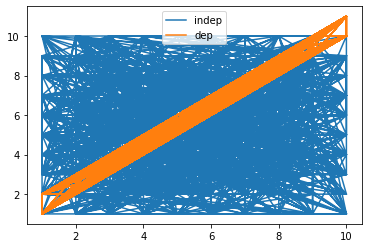

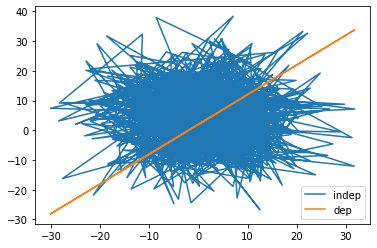

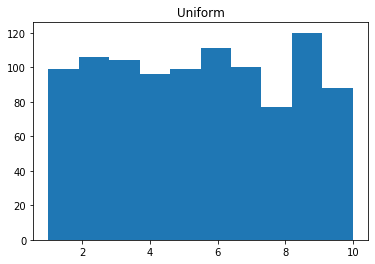

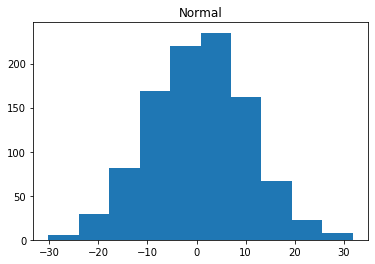

In [163]:
import numpy as np
import random
from matplotlib import pyplot as plt

# creating some uniforme distributed samples
uniforme = np.random.randint(1,11,1000)
uniforme_indep = np.random.randint(1,11,1000)
uniforme_dep = uniforme + np.random.randint(0,2,1000)

# creating some normal distributed samples
normal = np.random.normal(0,10,1000)
normal_indep = np.random.normal(5,10,1000)
normal_dep = normal + 2  

plt.plot(uniforme, uniforme_indep, label='indep')
plt.plot(uniforme, uniforme_dep, label='dep')
plt.legend()
plt.show()

plt.plot(normal, normal_indep, label='indep')
plt.plot(normal, normal_dep, label='dep')
plt.legend()
plt.show()

plt.hist(uniforme)
plt.title('Uniform')
plt.show()

plt.hist(normal)
plt.title('Normal')
plt.show()

# This tutorial is divided in 3 sections:
* Normality tests
* Correlation testes
* Parametric statistical hypothesis tests
* Nonparametric statistical hypothesis tests

## The smaller the P-value, the stronger the evidence against the null hypothesis.

Null hypothesis: sample has a Gaussian distribution
Small p-value we reject the H0, ie, sample is not normal distributed

Shapiro
(0.9349708557128906, 1.837760253164846e-20)
(0.9990619421005249, 0.9031746983528137)

Normal Test
NormaltestResult(statistic=911.8262583803098, pvalue=9.987200425113684e-199)
NormaltestResult(statistic=0.09824341534270489, pvalue=0.9520652490024314)

Anderson-Darling Test
AndersonResult(statistic=17.54755773624231, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.1254061534508537, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


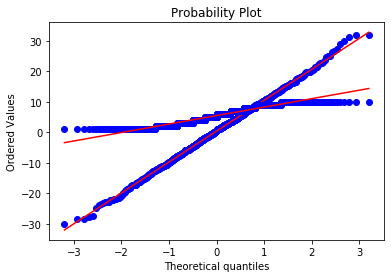

In [164]:
# Normality Tests
# Tests whether a data sample has a Gaussian distribution.

# Assumptions
#Observations in each sample are independent and identically distributed (iid).

#Interpretation
#H0: the sample has a Gaussian distribution.
#H1: the sample does not have a Gaussian distribution.

from scipy import stats
stats.probplot(normal, plot= plt)
stats.probplot(uniforme, plot= plt)

print("Null hypothesis: sample has a Gaussian distribution")
print("Small p-value we reject the H0, ie, sample is not normal distributed")

print("\nShapiro")
from scipy.stats import shapiro
#stat, p = shapiro(column)
print(shapiro(uniforme))
print(shapiro(normal))

print("\nNormal Test")
from scipy.stats import normaltest
#stat, p = normaltest(column)
print(normaltest(uniforme))
print(normaltest(normal))

print("\nAnderson-Darling Test")
from scipy.stats import anderson
#result = anderson(column)
print(anderson(uniforme))
print(anderson(normal))

In [165]:
#Correlation Tests

#Pearson’s Correlation Coefficient
#Tests whether two samples have a linear relationship.

#Assumptions
#Observations in each sample are independent and identically distributed (iid).
#Observations in each sample are normally distributed.
#Observations in each sample have the same variance.

#Interpretation
#H0: the two samples are independent.
#H1: there is a dependency between the samples.

print("Null hypothesis: samples are independent")
print("Small p-value we reject the H0, ie, there is dependency between the samples")

from scipy.stats import pearsonr
#corr, p = pearsonr(column1, column2)
print(pearsonr(normal, normal_indep))
print(pearsonr(normal, normal_dep))

Null hypothesis: samples are independent
Small p-value we reject the H0, ie, there is dependency between the samples
(-0.05104786874342151, 0.10667755391162731)
(1.0, 0.0)


In [166]:
#Spearman’s Rank Correlation
#Tests whether two samples have a monotonic relationship.

#Assumptions
#Observations in each sample are independent and identically distributed (iid).
#Observations in each sample can be ranked.

#Interpretation
#H0: the two samples are independent.
#H1: there is a dependency between the samples.

print("Null hypothesis: samples are independent")
print("Small p-value we reject the H0, ie, there is dependency between the samples")

from scipy.stats import spearmanr
#corr, p = spearmanr(column1, column2)
print(spearmanr(uniforme, uniforme_indep))
print(spearmanr(uniforme, uniforme_dep))

Null hypothesis: samples are independent
Small p-value we reject the H0, ie, there is dependency between the samples
SpearmanrResult(correlation=0.013999358068727215, pvalue=0.6583686908378333)
SpearmanrResult(correlation=0.9859012576574219, pvalue=0.0)


In [167]:
#Kendall’s Rank Correlation
#Tests whether two samples have a monotonic relationship.

#Assumptions
#Observations in each sample are independent and identically distributed (iid).
#Observations in each sample can be ranked.

#Interpretation
#H0: the two samples are independent.
#H1: there is a dependency between the samples.

print("Null hypothesis: samples are independent")
print("Small p-value we reject the H0, ie, there is dependency between the samples")

from scipy.stats import kendalltau
#corr, p = kendalltau(column1, column2)
print(kendalltau(uniforme, uniforme_indep))
print(kendalltau(uniforme, uniforme_dep))

Null hypothesis: samples are independent
Small p-value we reject the H0, ie, there is dependency between the samples
KendalltauResult(correlation=0.009910153117551706, pvalue=0.6695568374377168)
KendalltauResult(correlation=0.947463696197472, pvalue=0.0)


In [168]:
#Chi-Squared Test
#Tests whether two categorical variables are related or independent.

#Assumptions
#Observations used in the calculation of the contingency table are independent.
#25 or more examples in each cell of the contingency table.

#Interpretation
#H0: the two samples are independent.
#H1: there is a dependency between the samples.

print("Null hypothesis: samples are independent")
print("Small p-value we reject the H0, ie, there is dependency between the samples")

table_indep = [[10, 20, 30], [20,  10,  50]]
table_dep = [[10, 20, 30], [20,  40,  60]]

from scipy.stats import chi2_contingency
#stat, p, dof, expected = chi2_contingency(contigency_table)
print(chi2_contingency(table_indep))
print(chi2_contingency(table_dep))

Null hypothesis: samples are independent
Small p-value we reject the H0, ie, there is dependency between the samples
(8.993055555555554, 0.011147636487312589, 2, array([[12.85714286, 12.85714286, 34.28571429],
       [17.14285714, 17.14285714, 45.71428571]]))
(0.0, 1.0, 2, array([[10., 20., 30.],
       [20., 40., 60.]]))


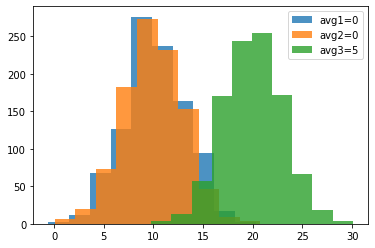

Null hypothesis: means are equal
Small p-value we reject the H0, ie, there is difference between means
Ttest_indResult(statistic=-73.37574667756506, pvalue=0.0)
Ttest_indResult(statistic=0.5936505880122728, pvalue=0.552813037260648)


In [182]:
#Parametric Statistical Hypothesis Tests
#This section lists statistical tests that you can use to compare data samples.

#Student’s t-test
#Tests whether the means of two independent samples are significantly different.

#Assumptions
#Observations in each sample are independent and identically distributed (iid).
#Observations in each sample are normally distributed.
#Observations in each sample have the same variance.

#Interpretation
#H0: the means of the samples are equal.
#H1: the means of the samples are unequal.

s1 = np.random.normal(10,3,1000)
s2 = np.random.normal(10,3,1000)
s3 = np.random.normal(20,3,1000)

plt.hist(s1, label='avg1=0', alpha = 0.8)
plt.hist(s2, label='avg2=0', alpha = 0.8)
plt.hist(s3, label='avg3=5', alpha = 0.8)
plt.legend()
plt.show()

print("Null hypothesis: means are equal")
print("Small p-value we reject the H0, ie, there is difference between means")

from scipy.stats import ttest_ind
#stat, p = ttest_ind(column1, column2)
print(ttest_ind(s1, s3))
print(ttest_ind(s1, s2))

In [185]:
#Paired Student’s t-test
#Tests whether the means of two paired samples are significantly different.

#Assumptions
#Observations in each sample are independent and identically distributed (iid).
#Observations in each sample are normally distributed.
#Observations in each sample have the same variance.
#Observations across each sample are paired.

#Interpretation
#H0: the means of the samples are equal.
#H1: the means of the samples are unequal.

print("Null hypothesis: means are equal")
print("Small p-value we reject the H0, ie, there is difference between means")

from scipy.stats import ttest_rel
#stat, p = ttest_rel(column1, column2)
print(ttest_rel(s1, s1+np.random.normal(2,1,1000)))
print(ttest_rel(s1, s1+np.random.normal(0,1,1000)))

Null hypothesis: means are equal
Small p-value we reject the H0, ie, there is difference between means
Ttest_relResult(statistic=-61.82868665728833, pvalue=0.0)
Ttest_relResult(statistic=0.4050843766751243, pvalue=0.6855022169109359)


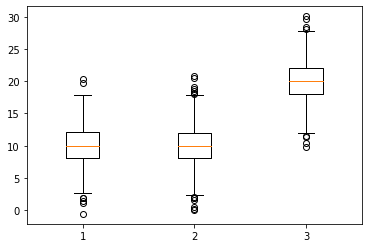

Null hypothesis: means are all equal
Small p-value we reject the H0, ie, there is at least one different mean
F_onewayResult(statistic=3638.0219677782134, pvalue=0.0)
F_onewayResult(statistic=0.3524210206473035, pvalue=0.5528130372608095)


In [189]:
#Analysis of Variance Test (ANOVA)
#Tests whether the means of two or more independent samples are significantly different.

#Assumptions
#Observations in each sample are independent and identically distributed (iid).
#Observations in each sample are normally distributed.
#Observations in each sample have the same variance.

#Interpretation
#H0: the means of the samples are equal.
#H1: one or more of the means of the samples are unequal.

plt.boxplot([s1,s2,s3])
plt.show()

print("Null hypothesis: means are all equal")
print("Small p-value we reject the H0, ie, there is at least one different mean")

from scipy.stats import f_oneway
#stat, p = f_oneway(column1, column2, columnN)
print(f_oneway(s1, s2, s3))
print(f_oneway(s1, s2))

In [231]:
#Nonparametric Statistical Hypothesis Tests

#Mann-Whitney U Test
#Tests whether the distributions of two independent samples are equal or not.

#Assumptions
#Observations in each sample are independent and identically distributed (iid).
#Observations in each sample can be ranked.

#Interpretation
#H0: the distributions of both samples are equal.
#H1: the distributions of both samples are not equal.

print("Null hypothesis: distributions are equal")
print("Small p-value we reject the H0, ie, different distributions")

from scipy.stats import mannwhitneyu
#stat, p = mannwhitneyu(column1, column2)
print(mannwhitneyu(np.random.randint(-5,5,1000), np.random.randint(-5,5,1000)))
print(mannwhitneyu(np.random.randint(-5,5,1000), np.random.randint(0,5,1000)))

Null hypothesis: distributions are equal
Small p-value we reject the H0, ie, different distributions
MannwhitneyuResult(statistic=493855.0, pvalue=0.3162245555053883)
MannwhitneyuResult(statistic=245984.5, pvalue=6.210251612554303e-88)


In [238]:
#Wilcoxon Signed-Rank Test
#Tests whether the distributions of two paired samples are equal or not.

#Assumptions
#Observations in each sample are independent and identically distributed (iid).
#Observations in each sample can be ranked.
#Observations across each sample are paired.

#Interpretation
#H0: the distributions of both samples are equal.
#H1: the distributions of both samples are not equal.

print("Null hypothesis: distributions are equal")
print("Small p-value we reject the H0, ie, different distributions")

from scipy.stats import wilcoxon
#stat, p = wilcoxon(column1, column2)
print(wilcoxon(np.random.randint(0,100,1000), np.random.randint(0,100,1000)+np.random.randint(-2,2,1000)))
print(wilcoxon(np.random.randint(0,100,1000), np.random.randint(0,100,1000)+np.random.randint(0,5,1000)))

Null hypothesis: distributions are equal
Small p-value we reject the H0, ie, different distributions
WilcoxonResult(statistic=232752.0, pvalue=0.18076945174004666)
WilcoxonResult(statistic=226195.0, pvalue=0.026183591481123838)


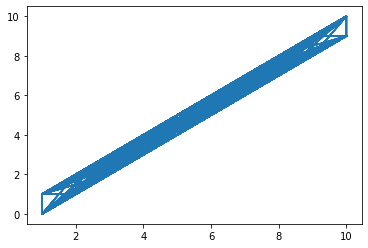

In [217]:
plt.plot(uniforme, uniforme+np.random.randint(0,2,1000)-1)

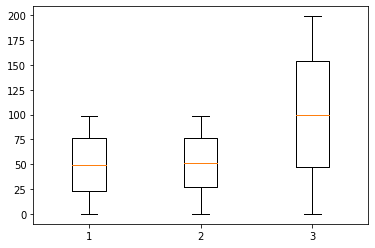

Null hypothesis: all distributions are equal
Small p-value we reject the H0, ie, there is at least one different distributions
KruskalResult(statistic=0.5199925999320526, pvalue=0.7710544387259072)
KruskalResult(statistic=470.0388597472233, pvalue=8.557727746797738e-103)


In [255]:
#Kruskal-Wallis H Test
#Tests whether the distributions of two or more independent samples are equal or not.

#Assumptions
#Observations in each sample are independent and identically distributed (iid).
#Observations in each sample can be ranked.

#Interpretation
#H0: the distributions of all samples are equal.
#H1: the distributions of one or more samples are not equal.

s1 = np.random.randint(0,100,1000)
s2 = np.random.randint(0,100,1000)
s3 = np.random.randint(0,200,1000)

plt.boxplot([s1,s2,s3])
plt.show()

print("Null hypothesis: all distributions are equal")
print("Small p-value we reject the H0, ie, there is at least one different distributions")

from scipy.stats import kruskal
#stat, p = kruskal(column1, column2, columnN)
print(kruskal(s1,s2,np.random.randint(0,100,1000)))
print(kruskal(s1,s2,s3))

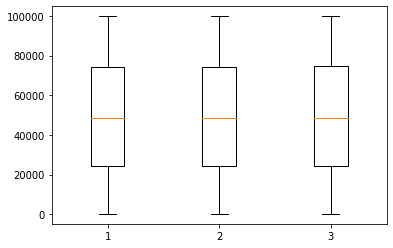

Null hypothesis: all distributions are equal
Small p-value we reject the H0, ie, there is at least one different distributions
FriedmanchisquareResult(statistic=103.0691785052494, pvalue=4.1573085688001236e-23)
FriedmanchisquareResult(statistic=1618.995479925552, pvalue=0.0)


In [261]:
#Friedman Test
#Tests whether the distributions of two or more paired samples are equal or not.

#Assumptions
#Observations in each sample are independent and identically distributed (iid).
#Observations in each sample can be ranked.
#Observations across each sample are paired.

#Interpretation
#H0: the distributions of all samples are equal.
#H1: the distributions of one or more samples are not equal.

s1 = np.random.randint(0,100000,1000)
s2 = s1 + np.random.randint(-2,2,1000)
s3 = s1 + np.random.randint(10,15,1000)

plt.boxplot([s1,s2,s3])
plt.show()

print("Null hypothesis: all distributions are equal")
print("Small p-value we reject the H0, ie, there is at least one different distributions")

from scipy.stats import friedmanchisquare
#stat, p = friedmanchisquare(column1, column2, columnN)
print(friedmanchisquare(s1,s2,s1+np.random.randint(-2,2,1000)))
print(friedmanchisquare(s1,s2,s3))